In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pennylane as qml
import pennylane.numpy as np

In [3]:
from circuit

In [4]:
interface = 'autograd'

In [45]:
if interface == 'autograd':
    import pennylane.numpy as np
    dev = qml.device("default.qubit", wires=range(3))
    def reset_params():
        return 0.05 * np.ones(18)

elif interface == 'jax':
    import jax
    import jax.numpy as jnp
    # next line raises TypeError with default.qubit.jax
    # dev = qml.device("default.qubit.jax", wires=range(3))
    dev = qml.device("default.qubit", wires=range(3))
    def reset_params():
        return jnp.array([0.05] * 18)
elif interface == 'torch':
    import torch
    dev = qml.device("default.qubit", wires=range(3))
    def reset_params():
        return torch.tensor([0.05] * 18, requires_grad=True)

In [6]:
@qml.qnode(dev, interface=interface)
def three_spins_forward_state(params, delta_time, n=10):
    three_spins_circuit(params)
    qml.ApproxTimeEvolution(hamiltonian(), delta_time, n)
    return qml.state()

@qml.qnode(dev, interface=interface)
def three_spins_current_state(params):
    three_spins_circuit(params)
    return qml.state()

@qml.qnode(dev, interface=interface)
def three_spins_obvservables(params):
    three_spins_circuit(params)
    return [qml.expval(qml.PauliX(i)) for i in range(3)]


In [46]:
# test this works
params = reset_params()
dt = 0.1
original_state = three_spins_current_state(params)
forward_state = three_spins_forward_state(params + 0.01, dt)

qml.math.fidelity(original_state, forward_state)

0.9724868837244939

In [47]:
prev_params = params

def cost_function(params):
    
    original_state = three_spins_current_state(prev_params)
    forward_state = three_spins_forward_state(params, dt)

    fidelity = qml.math.fidelity(original_state, forward_state)
    return 1 - fidelity


recorded_costs = [cost_function(params)]


In [48]:
prev_params = params
cost_function(np.random.random(18))

0.7087283866669527

In [68]:
total_time = 2.0
#total_time = 0.5
dt = 0.05
max_iterations = 500
cost_threshold = 0.0001
n_qubits = 3

prev_params = reset_params()
params = reset_params()


In [69]:
opt = qml.GradientDescentOptimizer(stepsize=0.1)

final_costs_v_time = []
full_costs_v_time = []
final_params_v_time = []
full_params_v_time = []
failed_to_converge_times = {}
number_of_iterations_to_converge = []
observables = []
time = []

In [70]:

for current_time in np.arange(0, total_time+dt, dt):
    print(current_time)
    
    prev_params = params
    recorded_params = [params]

    recorded_costs = [cost_function(params)]

    for n in range(max_iterations):
        params, prev_cost = opt.step_and_cost(cost_function, params)

        recorded_costs.append(cost_function(params))
        recorded_params.append(params)

        if recorded_costs[-1] <= cost_threshold:
            break

    print(f'{n} iterations to converge')
    if recorded_costs[-1] > cost_threshold:
        failed_to_converge_times[current_time] = recorded_costs[-1]
        
    time.append(current_time)
    observables.append(three_spins_obvservables(params))
    final_costs_v_time.append(recorded_costs[-1])
    full_costs_v_time.append(recorded_costs)
    final_params_v_time.append(recorded_params[-1])
    full_params_v_time.append(recorded_params)

0.0
21 iterations to converge
0.05
21 iterations to converge
0.1
21 iterations to converge
0.15000000000000002
21 iterations to converge
0.2
21 iterations to converge
0.25
21 iterations to converge
0.30000000000000004
21 iterations to converge
0.35000000000000003
21 iterations to converge
0.4
21 iterations to converge
0.45
21 iterations to converge
0.5
21 iterations to converge
0.55
20 iterations to converge
0.6000000000000001
20 iterations to converge
0.65
20 iterations to converge
0.7000000000000001
20 iterations to converge
0.75
20 iterations to converge
0.8
21 iterations to converge
0.8500000000000001
21 iterations to converge
0.9
21 iterations to converge
0.9500000000000001
21 iterations to converge
1.0
21 iterations to converge
1.05
21 iterations to converge
1.1
22 iterations to converge
1.1500000000000001
22 iterations to converge
1.2000000000000002
22 iterations to converge
1.25
23 iterations to converge
1.3
24 iterations to converge
1.35
25 iterations to converge
1.40000000000

In [71]:
final_costs_v_time

[8.534379615643406e-05,
 8.667242128646002e-05,
 8.876092307064098e-05,
 9.091856832754708e-05,
 9.261565155893603e-05,
 9.352678952878613e-05,
 9.348102833117711e-05,
 9.241832097139913e-05,
 9.039041656722091e-05,
 8.75980686279032e-05,
 8.443131202739984e-05,
 9.894863084991545e-05,
 9.676568034766575e-05,
 9.597131249272639e-05,
 9.67639465283554e-05,
 9.888165880111988e-05,
 8.395080583423198e-05,
 8.660930468407102e-05,
 8.896338784925018e-05,
 9.10748030287234e-05,
 9.330826443443296e-05,
 9.618292579050003e-05,
 8.359517447065201e-05,
 8.89659204499349e-05,
 9.658740016971201e-05,
 9.146477016375165e-05,
 9.066145654379465e-05,
 9.395956918012427e-05,
 9.075883866360712e-05,
 9.269475771700453e-05,
 9.754434868647355e-05,
 9.647609828444814e-05,
 9.510174832694229e-05,
 9.976661648258833e-05,
 9.963122868028584e-05,
 9.778948621630423e-05,
 9.778726478948396e-05,
 9.888968625482164e-05,
 9.859160616576546e-05,
 9.821308443869192e-05,
 9.849099214298551e-05]

In [72]:
failed_to_converge_times

{}

In [73]:
final_params_v_time

[tensor([0.09527442, 0.09469498, 0.09527442, 0.048075  , 0.048075  ,
         0.04356784, 0.03662968, 0.04356784, 0.04390573, 0.04390573,
         0.09581645, 0.09718586, 0.09581645, 0.0429545 , 0.0429545 ,
         0.04803393, 0.0456511 , 0.04803393], requires_grad=True),
 tensor([0.14055842, 0.1394524 , 0.14055842, 0.04514624, 0.04514624,
         0.03770302, 0.02415901, 0.03770302, 0.03771833, 0.03771833,
         0.1415612 , 0.14412735, 0.1415612 , 0.03529684, 0.03529684,
         0.0461272 , 0.04102808, 0.0461272 ], requires_grad=True),
 tensor([0.18585476, 0.18427512, 0.18585476, 0.04140823, 0.04140823,
         0.0325213 , 0.01279959, 0.0325213 , 0.03155293, 0.03155293,
         0.18723621, 0.19080429, 0.18723621, 0.02720283, 0.02720283,
         0.0443654 , 0.03629463, 0.0443654 ], requires_grad=True),
 tensor([0.23116305, 0.22914746, 0.23116305, 0.03705965, 0.03705965,
         0.0280684 , 0.00261193, 0.0280684 , 0.02551431, 0.02551431,
         0.23284634, 0.23721042, 0.23284

In [74]:
observables

[tensor([0.10688482, 0.11366758, 0.10688482], requires_grad=True),
 tensor([0.10229813, 0.10444212, 0.10229813], requires_grad=True),
 tensor([0.09556866, 0.09081447, 0.09556866], requires_grad=True),
 tensor([0.08693481, 0.07329239, 0.08693481], requires_grad=True),
 tensor([0.07669762, 0.05252368, 0.07669762], requires_grad=True),
 tensor([0.06520128, 0.02925855, 0.06520128], requires_grad=True),
 tensor([0.0528177 , 0.00432046, 0.0528177 ], requires_grad=True),
 tensor([ 0.03993448, -0.02141604,  0.03993448], requires_grad=True),
 tensor([ 0.02694465, -0.04704444,  0.02694465], requires_grad=True),
 tensor([ 0.01423659, -0.07164656,  0.01423659], requires_grad=True),
 tensor([ 0.00218289, -0.09431818,  0.00218289], requires_grad=True),
 tensor([-0.00887496, -0.11418142, -0.00887496], requires_grad=True),
 tensor([-0.01867233, -0.13057695, -0.01867233], requires_grad=True),
 tensor([-0.02697515, -0.14290357, -0.02697515], requires_grad=True),
 tensor([-0.0336206 , -0.15075064, -0.033

In [75]:
import matplotlib.pyplot as plt

In [76]:
np.sum(observables, axis=1)

tensor([ 0.32743721,  0.30903838,  0.28195178,  0.24716201,  0.20591892,
         0.1596611 ,  0.10995585,  0.05845293,  0.00684486, -0.04317338,
        -0.0899524 , -0.13193135, -0.1679216 , -0.19685386, -0.21799184,
        -0.23097906, -0.23552238, -0.23213776, -0.22146808, -0.20438842,
        -0.18198281, -0.15553852, -0.12565665, -0.094773  , -0.06473144,
        -0.03633086, -0.01143973,  0.0081277 ,  0.02185396,  0.02839732,
         0.02696588,  0.01837184,  0.00297239, -0.01988535, -0.04883732,
        -0.08272988, -0.12074715, -0.16191959, -0.20532752, -0.25071857,
        -0.2976698 ], requires_grad=True)

In [77]:
time

[tensor(0., requires_grad=True),
 tensor(0.05, requires_grad=True),
 tensor(0.1, requires_grad=True),
 tensor(0.15, requires_grad=True),
 tensor(0.2, requires_grad=True),
 tensor(0.25, requires_grad=True),
 tensor(0.3, requires_grad=True),
 tensor(0.35, requires_grad=True),
 tensor(0.4, requires_grad=True),
 tensor(0.45, requires_grad=True),
 tensor(0.5, requires_grad=True),
 tensor(0.55, requires_grad=True),
 tensor(0.6, requires_grad=True),
 tensor(0.65, requires_grad=True),
 tensor(0.7, requires_grad=True),
 tensor(0.75, requires_grad=True),
 tensor(0.8, requires_grad=True),
 tensor(0.85, requires_grad=True),
 tensor(0.9, requires_grad=True),
 tensor(0.95, requires_grad=True),
 tensor(1., requires_grad=True),
 tensor(1.05, requires_grad=True),
 tensor(1.1, requires_grad=True),
 tensor(1.15, requires_grad=True),
 tensor(1.2, requires_grad=True),
 tensor(1.25, requires_grad=True),
 tensor(1.3, requires_grad=True),
 tensor(1.35, requires_grad=True),
 tensor(1.4, requires_grad=True),
 t

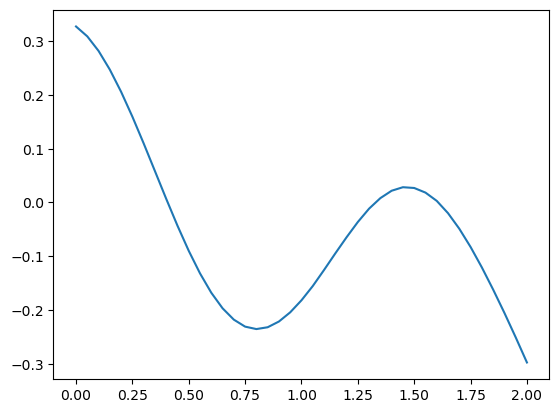

In [78]:
# expectation value of pauliX on qubit 0, 1 and 2 versus time.

plt.plot(time,np.sum(observables, axis=1))

In [80]:
np.sum(final_costs_v_time)

0.003820548064922269

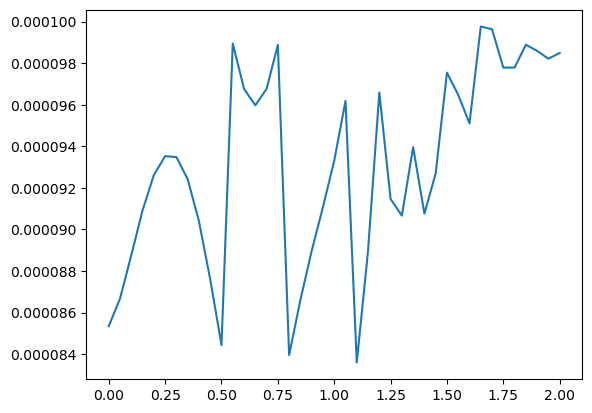

In [79]:
plt.plot(time, final_costs_v_time)